In [87]:
import pandas as pd

# load the dataset
file_path = "/Users/kostaskes/Documents/code/Projects/Activities.csv"
df = pd.read_csv(file_path)

# this will allow printing all rows and all columns 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

In [88]:
# display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Activity Type      1978 non-null   object
 1   Date               1978 non-null   object
 2   Title              1978 non-null   object
 3   Distance           1978 non-null   object
 4   Calories           1978 non-null   object
 5   Time               1978 non-null   object
 6   Avg HR             1978 non-null   object
 7   Max HR             1978 non-null   object
 8   Aerobic TE         1978 non-null   object
 9   Avg Speed          1978 non-null   object
 10  Max Speed          1978 non-null   object
 11  Total Ascent       1978 non-null   object
 12  Total Descent      1978 non-null   object
 13  Avg Stride Length  1978 non-null   object
 14  Steps              1978 non-null   object
 15  Min Temp           1978 non-null   object
 16  Best Lap Time      1978 non-null   object


In [89]:
# display first 5 rows
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Speed,Max Speed,Total Ascent,Total Descent,Avg Stride Length,Steps,Min Temp,Best Lap Time,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Strength Training,2023-07-16 08:33:30,Strength,0.00,99,00:39:16,69,100,0.1,--,--,--,--,--,8,32.0,00:39:16,33.0,--,--,--,00:39:16,00:39:16,--,--
1,Strength Training,2023-06-30 15:06:33,Strength,0.00,99,00:39:35,69,102,0.1,--,--,--,--,--,12,31.0,00:39:35,33.0,--,--,--,00:39:35,00:39:35,--,--
2,Yoga,2024-03-22 08:12:44,Yoga,--,99,00:20:51,90,105,0.2,--,--,--,--,--,--,30.0,00:20:51,31.0,15,11,17,00:20:51,00:20:51,--,--
3,Yoga,2023-04-12 21:39:00,Yoga,--,99,00:46:20,69,98,0.0,--,--,--,--,--,44,27.0,00:46:20,31.0,19,12,22,00:46:20,00:46:20,--,--
4,Yoga,2022-11-16 21:49:35,Yoga,--,99,00:40:25,70,92,0.1,--,--,--,--,--,--,29.0,00:40:25,31.0,16,12,20,00:40:25,00:40:25,--,--


Make all necessary conversions to data types

In [90]:
# convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# extract Year, Month, Month_Name, Year_Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Year_Month'] = df['Date'].dt.to_period('M').astype(str) 

# extract hour and minute as 'Time_of_the_day'
df['Time_of_the_day'] = df['Date'].dt.strftime('%H:%M')

# change 'Distance' data type to numeric
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
# replace 0 in the 'Distance' column with NaN
df['Distance'] = df['Distance'].replace(0, float('nan'))

In [91]:
columns_to_convert = [
    'Calories', 'Avg HR', 'Max HR', 'Aerobic TE', 'Total Ascent', 
    'Total Descent', 'Steps', 'Avg Resp', 'Min Resp', 'Max Resp', 
    'Min Elevation', 'Max Elevation'
]

# apply the conversion to all specified columns
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

Check when was the first and last date of activity

In [92]:
print(df['Date'].min())
print(df['Date'].max())

2019-01-24 18:30:08
2025-02-11 08:12:19


The dataset spans from January 24, 2019 to February 11, 2025,
covering over 6 years of activity data.


In [93]:
# check if all convertions were made 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Activity Type      1978 non-null   object        
 1   Date               1978 non-null   datetime64[ns]
 2   Title              1978 non-null   object        
 3   Distance           1377 non-null   float64       
 4   Calories           1977 non-null   float64       
 5   Time               1978 non-null   object        
 6   Avg HR             1972 non-null   float64       
 7   Max HR             1935 non-null   float64       
 8   Aerobic TE         1445 non-null   float64       
 9   Avg Speed          1978 non-null   object        
 10  Max Speed          1978 non-null   object        
 11  Total Ascent       1288 non-null   float64       
 12  Total Descent      1299 non-null   float64       
 13  Avg Stride Length  1978 non-null   object        
 14  Steps   

In [94]:
# get unique 'Activity Type' 
activity_types = df['Activity Type'].unique()

# print the unique activity types
print(activity_types)

['Strength Training' 'Yoga' 'Other' 'Gym & Fitness Equipment' 'HIIT'
 'Elliptical' 'Cardio' 'Indoor Cycling' 'Cycling' 'Walking' 'Hiking'
 'Trail Running' 'Casual Walking' 'Resort Skiing/Snowboarding'
 'Stand Up Paddleboarding' 'Open Water Swimming' 'Running'
 'Treadmill Running' 'Multisport']


In [95]:
# count the number of activities for each activity type
activity_counts = df['Activity Type'].value_counts()

# print the counts
print(activity_counts)


Activity Type
Running                       623
Walking                       587
Strength Training             339
Yoga                           98
Other                          84
Gym & Fitness Equipment        66
Trail Running                  42
Hiking                         32
Elliptical                     28
Open Water Swimming            22
Cycling                        16
HIIT                           12
Treadmill Running               8
Cardio                          6
Resort Skiing/Snowboarding      6
Indoor Cycling                  4
Stand Up Paddleboarding         2
Multisport                      2
Casual Walking                  1
Name: count, dtype: int64


In [96]:
# filter for running and trail running activities
running_activities = df[df['Activity Type'].isin(['Running', 'Trail Running', 'Treadmill Running'])]

# sort the running activities by date in descending order
running_activities = running_activities.sort_values(by='Date', ascending=False)

# count the total number of runs
total_runs = running_activities.shape[0]

print(f"You’ve completed {total_runs} running activities (including trail runs) since you started in 2019.")


You’ve completed 673 running activities (including trail runs) since you started in 2019.


In [101]:
running_activities.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Speed,Max Speed,Total Ascent,Total Descent,Avg Stride Length,Steps,Min Temp,Best Lap Time,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Year,Month,Month_Name,Year_Month,Time_of_the_day,Hour
655,Trail Running,2023-07-22 06:00:53,ZAGORI MARATHON+ 44km - RACE,43.68,4245.0,07:35:22,143.0,166.0,5.0,10:25,4:35,2600.0,2598.0,1.01,50558.0,24.0,00:04:01.1,37.0,NaN,NaN,NaN,07:03:14,07:42:53,503.0,2001.0,2023,7,July,2023-07,06:00,6
941,Trail Running,2022-10-02 10:58:42,Litochoro Trail Running,8.60,823.0,01:38:37,126.0,158.0,2.4,11:28,4:56,83.0,1558.0,1.00,11948.0,18.0,00:04:32.2,28.0,27.0,13.0,42.0,01:18:53,01:38:37,1117.0,2610.0,2022,10,October,2022-10,10:58,10
1011,Trail Running,2023-01-22 08:00:20,ROGKAS - RACE,35.11,3680.0,06:52:08,122.0,169.0,5.0,11:44,4:29,2397.0,2396.0,1.19,41540.0,11.0,00:04:29.3,23.0,NaN,NaN,NaN,05:37:03,06:52:10,275.0,1474.0,2023,1,January,2023-01,08:00,8
1067,Trail Running,2023-09-06 08:35:20,Agios Pavlos Trail Running,5.43,574.0,01:05:18,120.0,168.0,2.7,12:02,4:50,282.0,270.0,0.81,7286.0,24.0,00:04:49.7,30.0,NaN,NaN,NaN,00:58:04,01:13:43,166.0,332.0,2023,9,September,2023-09,08:35,8
1223,Trail Running,2022-10-02 09:11:12,3rd GOUMAROSTALI VERTICAL MILE - RACE,4.80,1500.0,01:36:44,161.0,169.0,4.9,20:09,6:21,1519.0,2.0,2.17,2988.0,20.0,00:17:44,25.0,36.0,13.0,45.0,00:38:02,01:36:44,1079.0,2600.0,2022,10,October,2022-10,09:11,9


Races

In [ ]:
# filter rows where 'Title' contains the word 'race' 
race_activities = df[df['Title'].str.contains('race', case=False, na=False)]

# sort by date
race_activities.sort_values(by='Date')

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Speed,Max Speed,Total Ascent,Total Descent,Avg Stride Length,Steps,Min Temp,Best Lap Time,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Year,Month,Month_Name,Year_Month,Time_of_the_day
1262,Running,2019-04-14 08:45:00,14th ATG RUN - 10K - RACE,10.00,956.0,00:46:42,177.0,NaN,NaN,4:40,--,NaN,NaN,--,NaN,--,--:--:--,--,NaN,NaN,NaN,--:--:--,00:46:42,NaN,NaN,2019,4,April,2019-04,08:45
1655,Trail Running,2021-10-17 11:21:23,1st LIVADI TRAIL RUN - RACE,16.87,1516.0,01:35:22,166.0,185.0,NaN,5:39,3:18,617.0,636.0,1.09,15626.0,19.0,00:04:13.7,28.0,NaN,NaN,NaN,01:34:30,01:35:22,630.0,968.0,2021,10,October,2021-10,11:21
1808,Trail Running,2021-11-28 09:05:00,6th SIZATHLOS SEIH SOU - RACE,28.04,2611.0,02:49:19,168.0,183.0,5.0,6:02,3:09,1121.0,1115.0,1.06,27172.0,17.0,00:00:53.6,27.0,NaN,NaN,NaN,02:46:34,02:49:19,105.0,531.0,2021,11,November,2021-11,09:05
1425,Running,2022-04-10 08:00:46,16th ATG MARATHON - RACE,42.47,3352.0,03:43:22,164.0,193.0,5.0,5:16,4:10,116.0,156.0,1.09,38984.0,18.0,00:04:27.2,32.0,NaN,NaN,NaN,03:41:18,03:43:22,2.0,50.0,2022,4,April,2022-04,08:00
1261,Running,2022-05-07 13:00:05,5th THEAGENIOS THASOS - RACE,18.95,1511.0,01:27:11,170.0,191.0,5.0,4:36,3:37,269.0,211.0,1.20,15752.0,24.0,00:03:56.8,32.0,NaN,NaN,NaN,01:26:57,01:27:11,4.0,78.0,2022,5,May,2022-05,13:00
1862,Trail Running,2022-07-10 10:29:22,2nd LIVADI TRAIL - RACE,21.51,1933.0,02:16:14,164.0,183.0,5.0,6:20,3:31,805.0,801.0,1.01,21444.0,25.0,00:03:47.5,32.0,NaN,NaN,NaN,02:11:00,02:16:14,646.0,976.0,2022,7,July,2022-07,10:29
1921,Trail Running,2022-09-11 09:00:41,4th NAOUSA VERMIO TRAIL - RACE,24.47,2338.0,02:58:59,160.0,177.0,5.0,7:19,3:49,1307.0,1298.0,0.90,27622.0,24.0,00:02:32.9,34.0,35.0,18.0,43.0,02:54:43,02:58:59,481.0,1252.0,2022,9,September,2022-09,09:00
1223,Trail Running,2022-10-02 09:11:12,3rd GOUMAROSTALI VERTICAL MILE - RACE,4.80,1500.0,01:36:44,161.0,169.0,4.9,20:09,6:21,1519.0,2.0,2.17,2988.0,20.0,00:17:44,25.0,36.0,13.0,45.0,00:38:02,01:36:44,1079.0,2600.0,2022,10,October,2022-10,09:11
1931,Trail Running,2022-11-13 10:39:33,10th PAIKO HALF-MARATHON - RACE,20.27,2256.0,02:37:41,157.0,181.0,4.9,7:47,3:28,1148.0,1142.0,0.91,22972.0,15.0,00:01:00.4,24.0,NaN,NaN,NaN,02:34:56,02:37:41,730.0,1352.0,2022,11,November,2022-11,10:39
1011,Trail Running,2023-01-22 08:00:20,ROGKAS - RACE,35.11,3680.0,06:52:08,122.0,169.0,5.0,11:44,4:29,2397.0,2396.0,1.19,41540.0,11.0,00:04:29.3,23.0,NaN,NaN,NaN,05:37:03,06:52:10,275.0,1474.0,2023,1,January,2023-01,08:00


In [102]:
# extract hour from the datetime
running_activities['Hour'] = running_activities['Date'].dt.hour

# count runs per hour
hour_counts = running_activities['Hour'].value_counts().sort_index()

# display the counts
print(hour_counts)

# most common hour
most_common_hour = hour_counts.idxmax()
print(f"\nMost common time for a run is around {most_common_hour}:00")


Hour
6      16
7     160
8      75
9      79
10     65
11     39
12     12
13     15
14      7
15     12
16     12
17     26
18     50
19     52
20     26
21     15
22      4
Name: count, dtype: int64

Most common time for a run is around 7:00


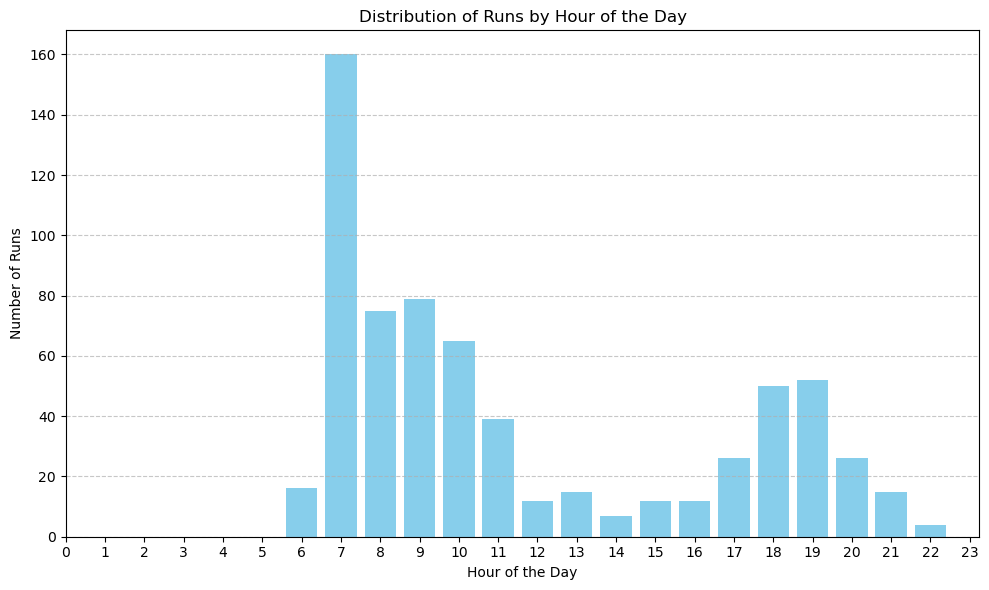

In [100]:
import matplotlib.pyplot as plt

# extract the hour from your existing DataFrame
running_activities['Hour'] = running_activities['Date'].dt.hour

# count how many runs happened at each hour
hour_counts = running_activities['Hour'].value_counts().sort_index()

# plot
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Runs')
plt.title('Distribution of Runs by Hour of the Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
